# Importing required Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
haber = pd.read_csv('haberman.csv', names=['Age', 'Year', 'Nodes', 'Status'])
haber.head()

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Ans 1

In [5]:
print(haber.shape)

(306, 4)


In [6]:
haber['Status'].value_counts()

1    225
2     81
Name: Status, dtype: int64

### Observation
So,1) There are 306 input points

2) There are 3 features i.e. Age, Nodes and Year

3)There is only one class i.e. Patient's survival Status

4) data-points per class for survival value = '1' - 225
                             survival value = '2' - 81

# Ans 2

### Objective:
Our objective is basically find pattern on patient's survival status. This is a bi-classification problem where we have two classes in which all values fall. We have to find a constraints that help us differentiate between this two classes using three features given.

# Ans 3

# PDF

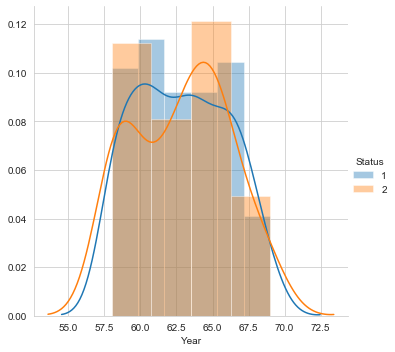

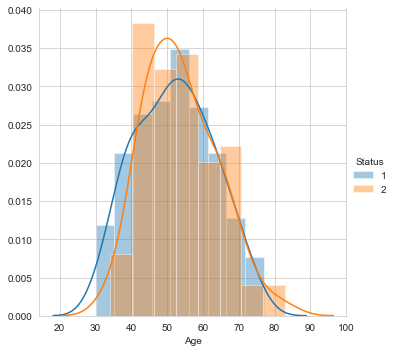

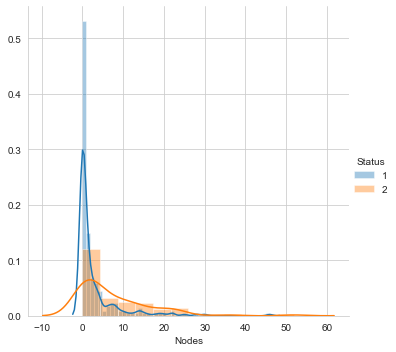

In [17]:
sns.FacetGrid(haber, hue = "Status", height = 5)\
   .map(sns.distplot, 'Year')\
   .add_legend()
plt.show()

sns.FacetGrid(haber, hue = "Status", height = 5)\
   .map(sns.distplot, "Age")\
   .add_legend()
plt.show()

sns.FacetGrid(haber, hue = 'Status', height = 5)\
   .map(sns.distplot, "Nodes")\
   .add_legend()
plt.show()

### Observation

From the last PDF plot we can say if the patient has lesser Nodes, he has more chance of living, WE can see blue line in last plot has most of its values in 0 to 10 range

Func:
If 'Nodes' < 5 then the person is survived else died.

# CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


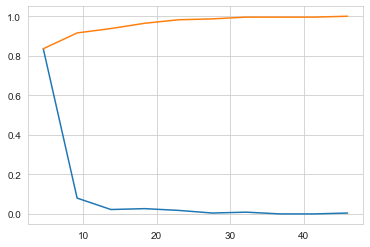

In [26]:
haber_sur = haber.loc[haber["Status"]==1]
counts, bin_edges = np.histogram(haber_sur['Nodes'], bins= 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

### Observation 

From here we can say all the survivors had 40 or less Nodes


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


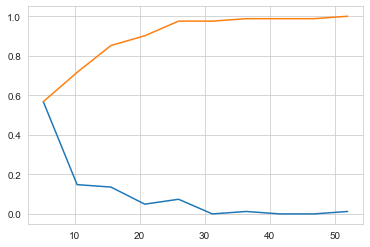

In [27]:
haber_lost = haber.loc[haber['Status']==2]
counts, bin_edges = np.histogram(haber_lost['Nodes'],bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

### Observation
Data is scattered however most of patients have nodes < 35

# Ans 4

# 2D Scatter Plot

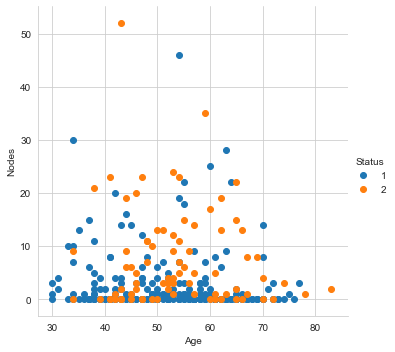

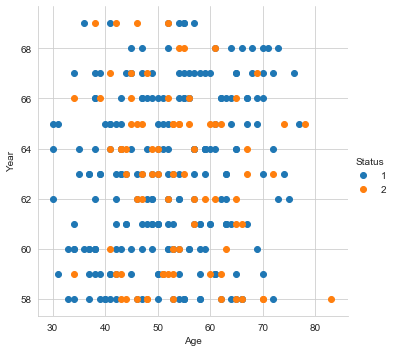

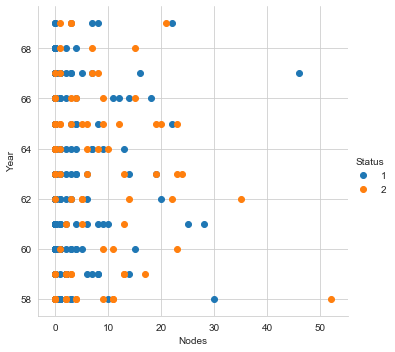

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(haber, hue = 'Status', height = 5)\
   .map(plt.scatter, 'Age', 'Nodes')\
   .add_legend()
plt.show()

sns.FacetGrid(haber, hue = 'Status', height = 5)\
   .map(plt.scatter, 'Age', 'Year')\
   .add_legend()
plt.show()

sns.FacetGrid(haber, hue = 'Status', height = 5)\
   .map(plt.scatter, 'Nodes', 'Year')\
   .add_legend()
plt.show()

### Observation 
Here these all graphs are overlapping so, it's hard to find a pattern

# Pair-plots

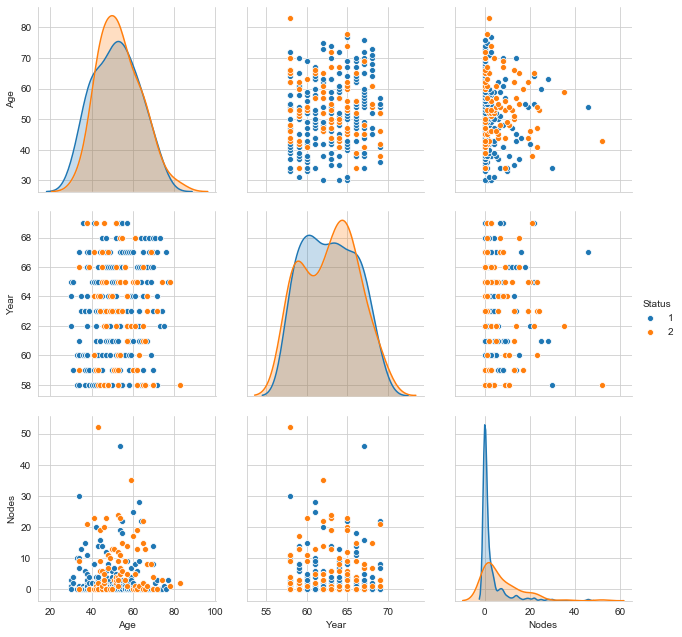

In [14]:
sns.set_style('whitegrid')
sns.pairplot(haber, hue = 'Status', height  = 3, vars = ('Age', 'Year', 'Nodes'))
plt.show()

### Observation

By just viewing the graphs, we can say that both of the class are well combined. 
They can't be easily differrentiable with these 2D methods.

# Ans 5